In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
df = pd.read_csv("customer_churnn.csv")
df.head()

,CustomerID,Age,Gender,Salary,Churn
0,101,25.0,Male,40000,No
1,102,NaN,FEMALE,42000,Yes
2,103,35.0,female,39000,No
3,104,45.0,M,1200000,No
4,105,28.0,male,41000,Yes


## Basic Understanding


In [3]:
df.shape


(21, 5)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  21 non-null     int64  
 1   Age         17 non-null     float64
 2   Gender      21 non-null     object 
 3   Salary      21 non-null     int64  
 4   Churn       21 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 972.0+ bytes


In [5]:
df.describe()


,CustomerID,Age,Salary
count,21.000000,17.000000,2.100000e+01
mean,110.761905,35.058824,5.700000e+05
std,5.889862,7.956684,2.175413e+06
min,101.000000,23.000000,3.600000e+04
25%,106.000000,29.000000,3.900000e+04
50%,111.000000,35.000000,4.000000e+04
75%,116.000000,38.000000,4.300000e+04
max,120.000000,52.000000,9.999999e+06


In [6]:
df.columns


Index(['CustomerID', 'Age', 'Gender', 'Salary', 'Churn'], dtype='object')

## Cleaning Dataset thoroughly


Checking missing values

In [7]:
df.isnull().sum()


CustomerID    0
Age           4
Gender        0
Salary        0
Churn         0
dtype: int64

Handle missing values

In [8]:
# Fill numerical columns with median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


Remove Duplicates

In [9]:
df.duplicated().sum()


1

In [10]:
df = df.drop_duplicates()


Standardize text column

In [11]:
for col in cat_cols:
    df[col] = df[col].str.strip().str.lower()


## Perform Meaningful Analysis

churn distribution

In [13]:
df['Churn'].value_counts(normalize=True)


Churn
no     0.6
yes    0.4
Name: proportion, dtype: float64

Numerical Feature comparison

In [15]:
df.groupby('Churn')[num_cols].mean()

,CustomerID,Age,Salary
Churn,,,
no,110.083333,37.500,967749.916667
yes,111.125000,31.375,39750.000000


Correlation matrix

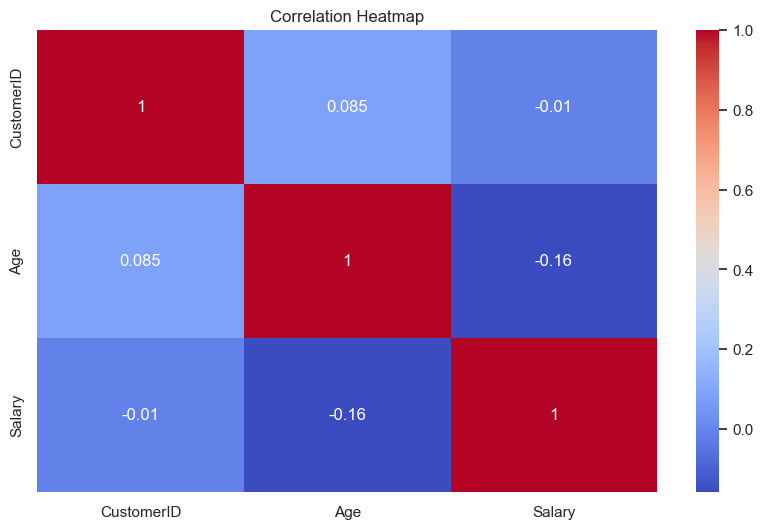

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## Creating 6 visualizations

Visualization 1: churn count

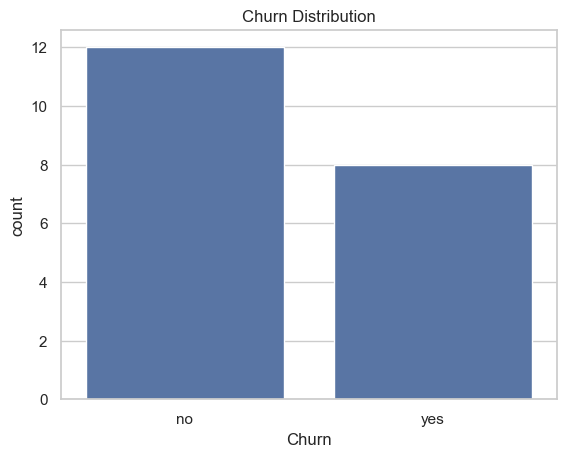

In [17]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


Visualization 2: Gender vs churn

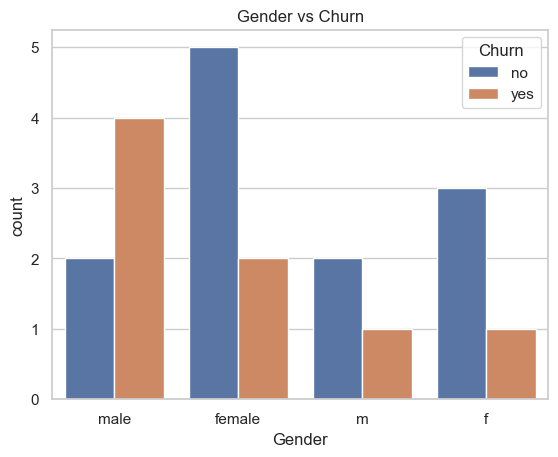

In [18]:
sns.countplot(x='Gender', hue='Churn', data=df)
plt.title("Gender vs Churn")
plt.show()


Visualization 3: Age Distribution

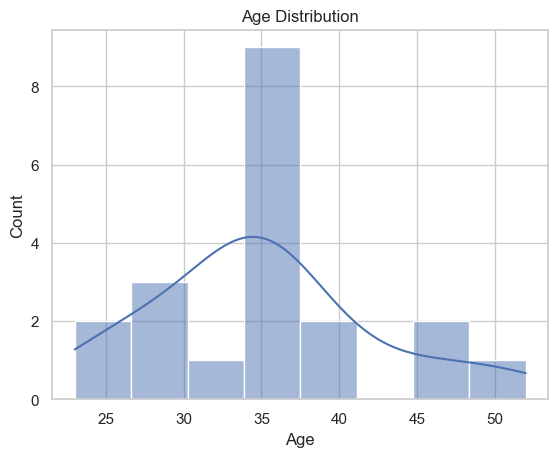

In [19]:
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()


Visualization 4 : Age Vs Churn

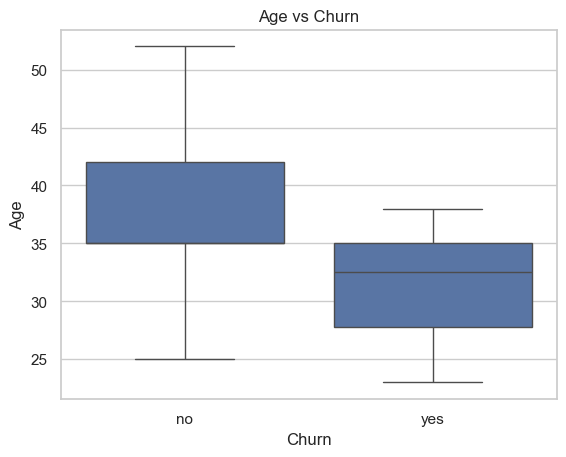

In [20]:
sns.boxplot(x='Churn', y='Age', data=df)
plt.title("Age vs Churn")
plt.show()


Visualization 5: Salary Distribution


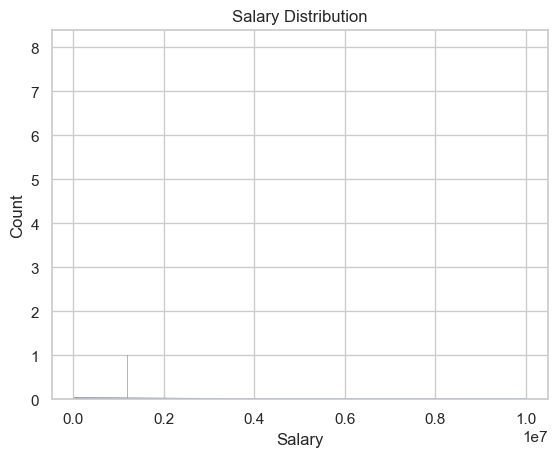

In [25]:
sns.histplot(df['Salary'], kde=True)
plt.title("Salary Distribution")
plt.show()


Visualization 6: Salary vs Churn

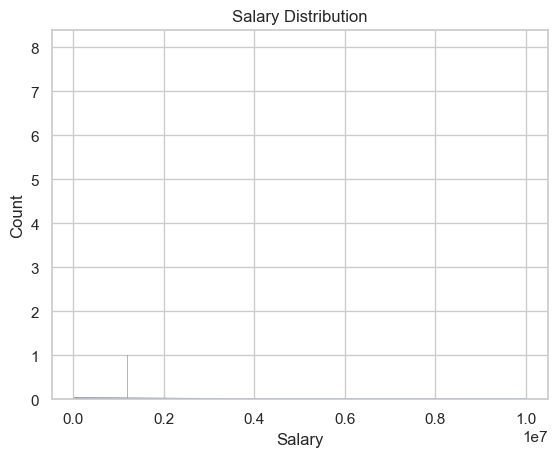

In [23]:
sns.histplot(df['Salary'], kde=True)
plt.title("Salary Distribution")
plt.show()


## Insights

1. Customers who churn tend to have slightly lower average salaries.

2. Younger customers show a higher tendency to churn compared to older customers.

3. Salary distribution contains significant outliers, which required capping.

4. Gender does not strongly influence churn, indicating neutral behavior.

5. The dataset required substantial cleaning, especially for gender consistency.

6. Churn rate is moderate, indicating room for retention strategies.